In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [98]:
np.random.seed(42)

In [99]:
def generate_data(sample_size):
    X = np.sort(5 * np.random.rand(sample_size))
    y = 0.5 * X**2 + 2 * X + 1 + np.random.normal(0, 1, sample_size)
    return X, y


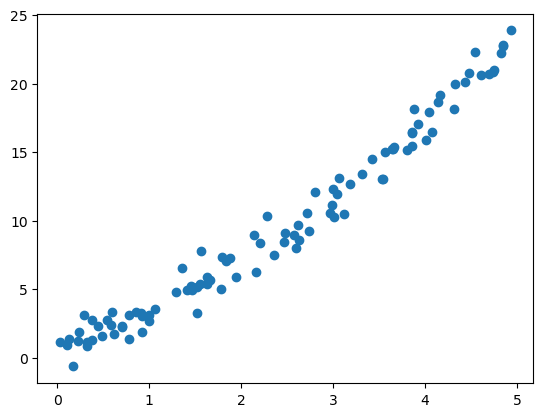

In [100]:
sample_size = 100
X, y = generate_data(sample_size)



plt.scatter(X, y, label='Noisy Data')

plt.show()

In [101]:
df = pd.DataFrame({'X': X, 'y': y})

# Display the DataFrame
df.head()

,X,y
0,0.027611,1.142649
1,0.102922,0.912134
2,0.127096,1.354029
3,0.171943,-0.628902
4,0.226136,1.258170


In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['X']],df[['y']],test_size=0.2)

In [103]:
X_train.head()
print(X_train.shape)
print(X_test.shape)

(80, 1)
(20, 1)


In [104]:
def polynomial_features(X, degree):
    features = np.column_stack([X**i for i in range(1, degree + 1)])
    return features

In [105]:
X_train_poly=polynomial_features(X_train,11)
X_test_poly=polynomial_features(X_test,11)



In [106]:
print(X_train_poly.shape)
print(X_test_poly.shape)


(80, 11)
(20, 11)


In [107]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [108]:
model.score(X_test_poly,y_test)

0.970684241562439

In [109]:
y_pred=model.predict(X_test_poly)
y_pred


array([[15.60065601],
       [17.22561012],
       [16.03921855],
       [22.21041895],
       [ 0.79633585],
       [15.90746144],
       [14.26093628],
       [17.50523214],
       [20.26733731],
       [ 8.19993025],
       [ 5.88554396],
       [ 8.62494081],
       [12.52768777],
       [18.20190233],
       [ 5.47784929],
       [ 7.91803769],
       [ 1.10841841],
       [ 1.72250832],
       [13.70486612],
       [16.37244499]])

In [110]:
y_test

,y
76,15.162749
83,17.909355
80,18.127489
98,22.734853
2,1.354029
77,16.371805
71,13.027354
84,16.492149
89,20.124239
50,7.518950


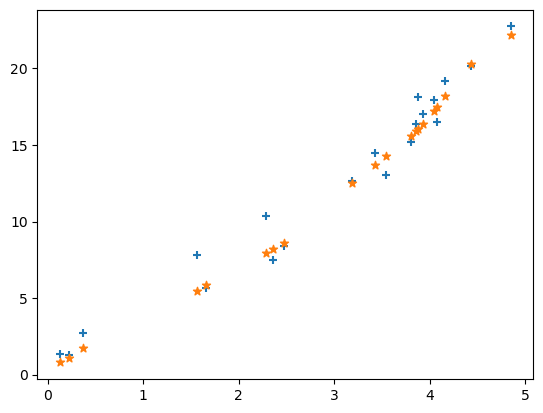

In [111]:
plt.scatter(X_test,y_test,marker='+')
plt.scatter(X_test,y_pred,marker='*')

In [112]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")

Root Mean Squared Error (RMSE) on test data: 1.0773694513135212


Using Lasso Regression

In [113]:
from sklearn import  linear_model
alpha=0.0001
lasso_reg=linear_model.Lasso(alpha, fit_intercept=True)
lasso_reg.fit(X_train_poly, y_train)

Lasso(alpha=0.0001)

In [114]:
lasso_reg.score(X_test_poly,y_test)

0.9703145090809837

In [115]:
y_pred_lasso=lasso_reg.predict(X_test_poly)
y_pred_lasso

array([15.8154748 , 17.27599639, 16.24928752, 22.51835731,  0.94427311,
       16.12275416, 14.27252284, 17.49754834, 19.80380398,  8.40181973,
        5.61536089,  8.87143831, 12.34069771, 18.03472926,  5.2722003 ,
        8.05860481,  1.20221196,  1.59417448, 13.60217855, 16.55626834])

In [116]:

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"Root Mean Squared Error (RMSE) on test data: {rmse_lasso}")

Root Mean Squared Error (RMSE) on test data: 1.0841420949641418


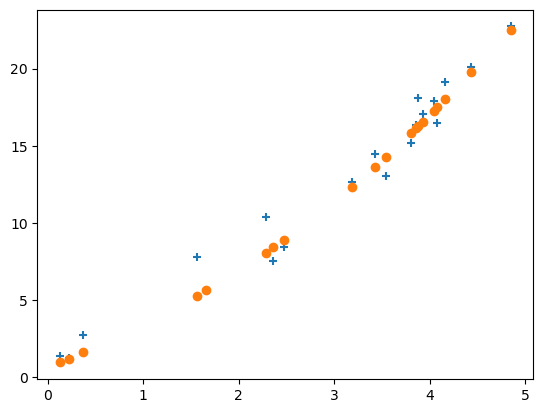

In [117]:
plt.scatter(X_test,y_test,marker='+')
plt.scatter(X_test,y_pred_lasso)

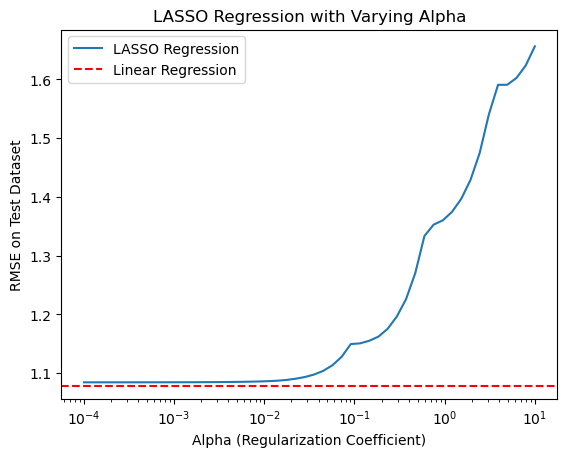

In [118]:
from sklearn import linear_model

alphas = np.logspace(-4, 1, 50)
rmse_lasso = []  # Initialize as an empty list

for alpha in alphas:
    lasso_reg = linear_model.Lasso(alpha=alpha, fit_intercept=True)
    lasso_reg.fit(X_train_poly, y_train)
    
    y_pred_lasso = lasso_reg.predict(X_test_poly)
    rmse_lasso.append(np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

# Plot the variation of RMSE on the test dataset versus alpha
plt.plot(alphas, rmse_lasso, label='LASSO Regression')
plt.axhline(y=rmse, color='r', linestyle='--', label='Linear Regression')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Coefficient)')
plt.ylabel('RMSE on Test Dataset')
plt.title('LASSO Regression with Varying Alpha')
plt.legend()
plt.show()
